PART A

1. Data Understanding & Exploration

In [1]:
# Importing required libraries 
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
import imblearn
from sklearn.preprocessing import LabelEncoder
from scipy.stats import zscore
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from scipy.spatial.distance import cdist
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn import metrics
from sklearn.metrics import classification_report, accuracy_score, recall_score, confusion_matrix, roc_curve, roc_auc_score
from sklearn.model_selection import GridSearchCV
import sklearn.svm
from sklearn.svm import SVC
from sklearn.decomposition import PCA
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Reading ‘Car name.csv’ as a DataFrame and assigning it to a variable
data1 = pd.read_csv("C:/Users/ruhee/OneDrive/Desktop/AIML/Unsupervised Learning/Car name.csv")

In [3]:
# Reading ‘Car-Attributes.json as a DataFrame and assigning it to a variable
data2 = pd.read_json(r"C:/Users/ruhee/OneDrive/Desktop/AIML/Unsupervised Learning/Car-Attributes.json")

In [4]:
# Merging both the DataFrames together to form a single DataFrame
data = pd.concat([data1, data2], axis = 1)

In [5]:
data.head()

,car_name,mpg,cyl,disp,hp,wt,acc,yr,origin
0,chevrolet chevelle malibu,18.0,8,307.0,130,3504,12.0,70,1
1,buick skylark 320,15.0,8,350.0,165,3693,11.5,70,1
2,plymouth satellite,18.0,8,318.0,150,3436,11.0,70,1
3,amc rebel sst,16.0,8,304.0,150,3433,12.0,70,1
4,ford torino,17.0,8,302.0,140,3449,10.5,70,1


In [6]:
data.shape

(398, 9)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   car_name  398 non-null    object 
 1   mpg       398 non-null    float64
 2   cyl       398 non-null    int64  
 3   disp      398 non-null    float64
 4   hp        398 non-null    object 
 5   wt        398 non-null    int64  
 6   acc       398 non-null    float64
 7   yr        398 non-null    int64  
 8   origin    398 non-null    int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


In [8]:
# Printing 5 point summary of the numerical features
data.describe().T

,count,mean,std,min,25%,50%,75%,max
mpg,398.0,23.514573,7.815984,9.0,17.500,23.0,29.000,46.6
cyl,398.0,5.454774,1.701004,3.0,4.000,4.0,8.000,8.0
disp,398.0,193.425879,104.269838,68.0,104.250,148.5,262.000,455.0
wt,398.0,2970.424623,846.841774,1613.0,2223.750,2803.5,3608.000,5140.0
acc,398.0,15.568090,2.757689,8.0,13.825,15.5,17.175,24.8
yr,398.0,76.010050,3.697627,70.0,73.000,76.0,79.000,82.0
origin,398.0,1.572864,0.802055,1.0,1.000,1.0,2.000,3.0


'hp' is also a numerical feature but it is not present in the 5 point summary because it is of 'object' type. This means there are some unexpected values in 'hp'.

2. Data Preparation & Analysis

In [9]:
# Feature-wise percentage of missing values
print(data.isnull().sum() * 100 / len(data))

car_name    0.0
mpg         0.0
cyl         0.0
disp        0.0
hp          0.0
wt          0.0
acc         0.0
yr          0.0
origin      0.0
dtype: float64


There are no missing values in the DataFrame.

In [10]:
# Checking for duplicate values
data.duplicated().sum()

0

There are no duplicate values in the DataFrame.

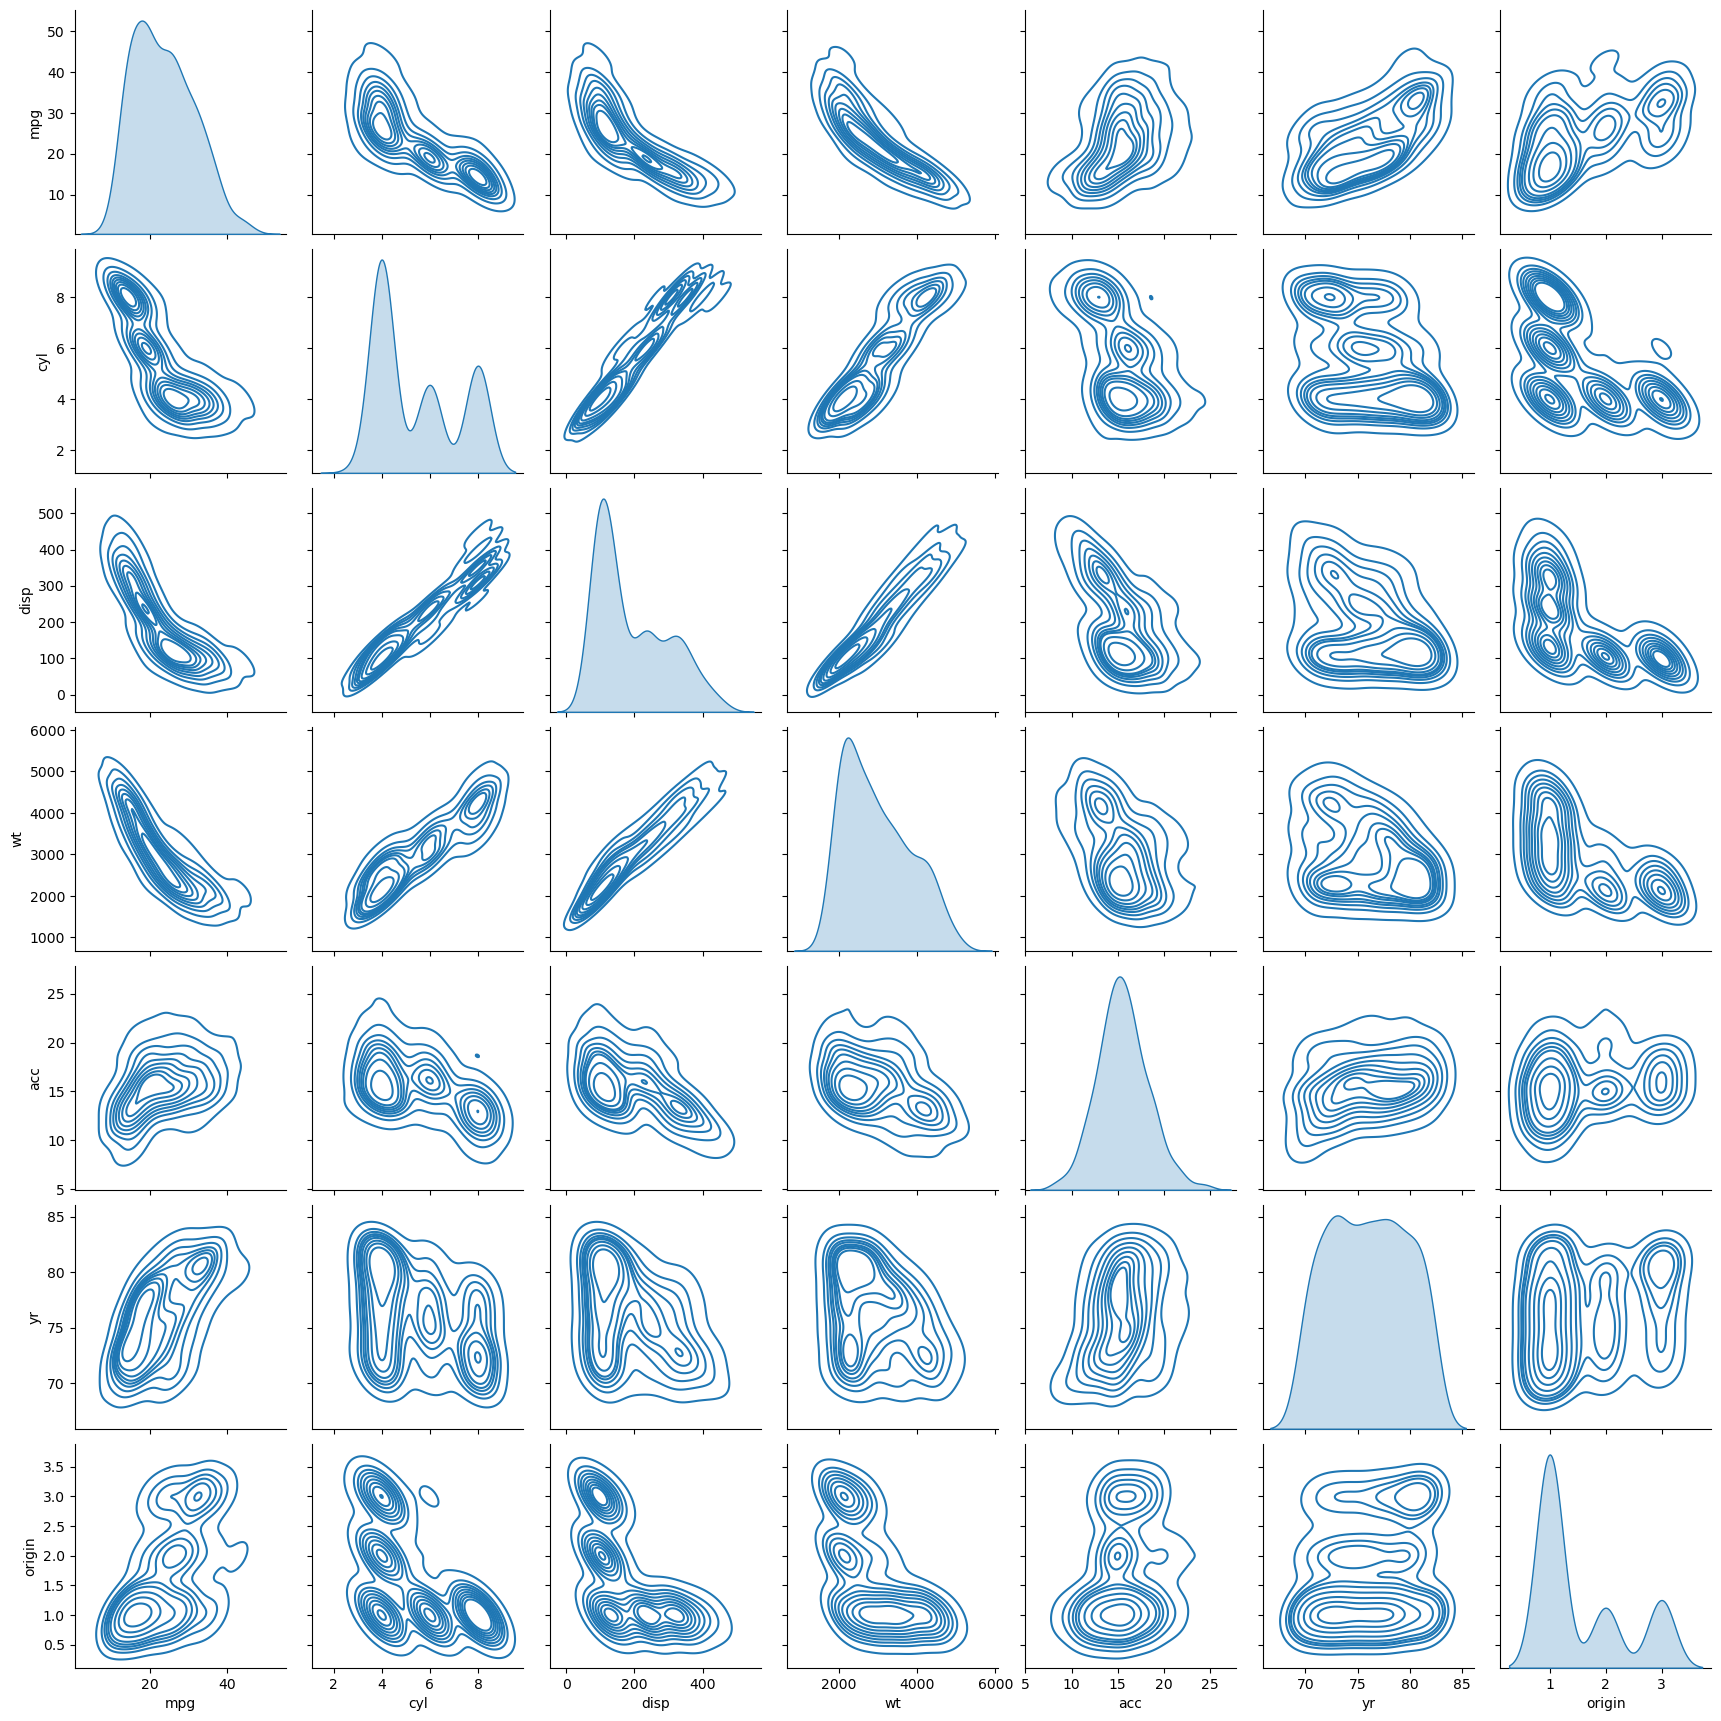

In [11]:
# Plotting a pairplot for all features
sns.pairplot(data = data, kind = 'kde');

'hp' was not plotted in the pair plot since it is of object type.

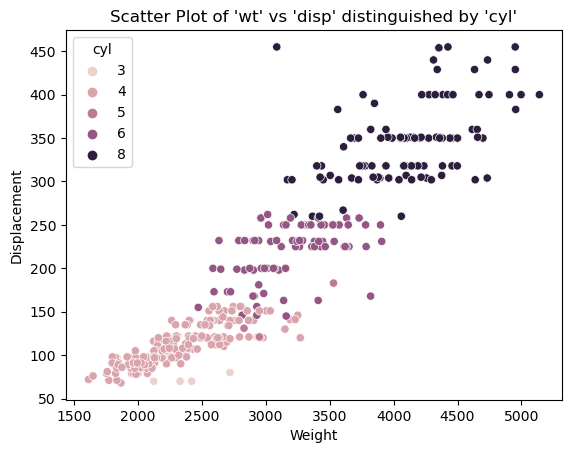

In [12]:
# Visualizing a scatterplot for 'wt' and 'disp' distinguishable by 'cyl'
sns.scatterplot(data = data, x = 'wt', y = 'disp', hue = 'cyl')
plt.title("Scatter Plot of 'wt' vs 'disp' distinguished by 'cyl'")
plt.xlabel('Weight')
plt.ylabel('Displacement')
plt.show()

There is an upward trend. There is positive correlation between 'wt' and 'disp'.

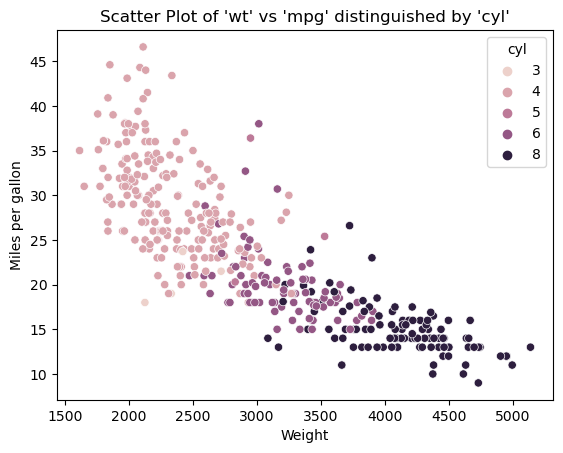

In [13]:
# Visualizing a scatterplot for 'wt' and 'mpg' distinguishable by 'cyl'
sns.scatterplot(data = data, x = 'wt', y = 'mpg', hue = 'cyl')
plt.title("Scatter Plot of 'wt' vs 'mpg' distinguished by 'cyl'")
plt.xlabel('Weight')
plt.ylabel('Miles per gallon')
plt.show()

There is a downward trend. There is negative correlation between 'wt' and 'mpg'.

In [14]:
# Checking for unexpected values in 'car-name'
data['car_name'].unique()

array(['chevrolet chevelle malibu', 'buick skylark 320',
       'plymouth satellite', 'amc rebel sst', 'ford torino',
       'ford galaxie 500', 'chevrolet impala', 'plymouth fury iii',
       'pontiac catalina', 'amc ambassador dpl', 'dodge challenger se',
       "plymouth 'cuda 340", 'chevrolet monte carlo',
       'buick estate wagon (sw)', 'toyota corona mark ii',
       'plymouth duster', 'amc hornet', 'ford maverick', 'datsun pl510',
       'volkswagen 1131 deluxe sedan', 'peugeot 504', 'audi 100 ls',
       'saab 99e', 'bmw 2002', 'amc gremlin', 'ford f250', 'chevy c20',
       'dodge d200', 'hi 1200d', 'chevrolet vega 2300', 'toyota corona',
       'ford pinto', 'plymouth satellite custom', 'ford torino 500',
       'amc matador', 'pontiac catalina brougham', 'dodge monaco (sw)',
       'ford country squire (sw)', 'pontiac safari (sw)',
       'amc hornet sportabout (sw)', 'chevrolet vega (sw)',
       'pontiac firebird', 'ford mustang', 'mercury capri 2000',
       'opel 1900'

In [15]:
# Checking for unexpected values in 'mpg'
data['mpg'].unique()

array([18. , 15. , 16. , 17. , 14. , 24. , 22. , 21. , 27. , 26. , 25. ,
       10. , 11. ,  9. , 28. , 19. , 12. , 13. , 23. , 30. , 31. , 35. ,
       20. , 29. , 32. , 33. , 17.5, 15.5, 14.5, 22.5, 24.5, 18.5, 29.5,
       26.5, 16.5, 31.5, 36. , 25.5, 33.5, 20.5, 30.5, 21.5, 43.1, 36.1,
       32.8, 39.4, 19.9, 19.4, 20.2, 19.2, 25.1, 20.6, 20.8, 18.6, 18.1,
       17.7, 27.5, 27.2, 30.9, 21.1, 23.2, 23.8, 23.9, 20.3, 21.6, 16.2,
       19.8, 22.3, 17.6, 18.2, 16.9, 31.9, 34.1, 35.7, 27.4, 25.4, 34.2,
       34.5, 31.8, 37.3, 28.4, 28.8, 26.8, 41.5, 38.1, 32.1, 37.2, 26.4,
       24.3, 19.1, 34.3, 29.8, 31.3, 37. , 32.2, 46.6, 27.9, 40.8, 44.3,
       43.4, 36.4, 44.6, 40.9, 33.8, 32.7, 23.7, 23.6, 32.4, 26.6, 25.8,
       23.5, 39.1, 39. , 35.1, 32.3, 37.7, 34.7, 34.4, 29.9, 33.7, 32.9,
       31.6, 28.1, 30.7, 24.2, 22.4, 34. , 38. , 44. ])

In [16]:
# Checking for unexpected values in 'cyl'
data['cyl'].unique()

array([8, 4, 6, 3, 5], dtype=int64)

In [17]:
# Checking for unexpected values in 'disp'
data['disp'].unique()

array([307. , 350. , 318. , 304. , 302. , 429. , 454. , 440. , 455. ,
       390. , 383. , 340. , 400. , 113. , 198. , 199. , 200. ,  97. ,
       110. , 107. , 104. , 121. , 360. , 140. ,  98. , 232. , 225. ,
       250. , 351. , 258. , 122. , 116. ,  79. ,  88. ,  71. ,  72. ,
        91. ,  97.5,  70. , 120. ,  96. , 108. , 155. ,  68. , 114. ,
       156. ,  76. ,  83. ,  90. , 231. , 262. , 134. , 119. , 171. ,
       115. , 101. , 305. ,  85. , 130. , 168. , 111. , 260. , 151. ,
       146. ,  80. ,  78. , 105. , 131. , 163. ,  89. , 267. ,  86. ,
       183. , 141. , 173. , 135. ,  81. , 100. , 145. , 112. , 181. ,
       144. ])

In [18]:
# Checking for unexpected values in 'hp'
data['hp'].unique()

array([130, 165, 150, 140, 198, 220, 215, 225, 190, 170, 160, 95, 97, 85,
       88, 46, 87, 90, 113, 200, 210, 193, '?', 100, 105, 175, 153, 180,
       110, 72, 86, 70, 76, 65, 69, 60, 80, 54, 208, 155, 112, 92, 145,
       137, 158, 167, 94, 107, 230, 49, 75, 91, 122, 67, 83, 78, 52, 61,
       93, 148, 129, 96, 71, 98, 115, 53, 81, 79, 120, 152, 102, 108, 68,
       58, 149, 89, 63, 48, 66, 139, 103, 125, 133, 138, 135, 142, 77, 62,
       132, 84, 64, 74, 116, 82], dtype=object)

'hp' has '?' which has to be dealt with.

In [19]:
# Checking for unexpected values in 'wt'
data['wt'].unique()

array([3504, 3693, 3436, 3433, 3449, 4341, 4354, 4312, 4425, 3850, 3563,
       3609, 3761, 3086, 2372, 2833, 2774, 2587, 2130, 1835, 2672, 2430,
       2375, 2234, 2648, 4615, 4376, 4382, 4732, 2264, 2228, 2046, 2634,
       3439, 3329, 3302, 3288, 4209, 4464, 4154, 4096, 4955, 4746, 5140,
       2962, 2408, 3282, 3139, 2220, 2123, 2074, 2065, 1773, 1613, 1834,
       1955, 2278, 2126, 2254, 2226, 4274, 4385, 4135, 4129, 3672, 4633,
       4502, 4456, 4422, 2330, 3892, 4098, 4294, 4077, 2933, 2511, 2979,
       2189, 2395, 2288, 2506, 2164, 2100, 4100, 3988, 4042, 3777, 4952,
       4363, 4237, 4735, 4951, 3821, 3121, 3278, 2945, 3021, 2904, 1950,
       4997, 4906, 4654, 4499, 2789, 2279, 2401, 2379, 2124, 2310, 2472,
       2265, 4082, 4278, 1867, 2158, 2582, 2868, 3399, 2660, 2807, 3664,
       3102, 2875, 2901, 3336, 2451, 1836, 2542, 3781, 3632, 3613, 4141,
       4699, 4457, 4638, 4257, 2219, 1963, 2300, 1649, 2003, 2125, 2108,
       2246, 2489, 2391, 2000, 3264, 3459, 3432, 31

In [20]:
# Checking for unexpected values in 'acc'
data['acc'].unique()

array([12. , 11.5, 11. , 10.5, 10. ,  9. ,  8.5,  8. ,  9.5, 15. , 15.5,
       16. , 14.5, 20.5, 17.5, 12.5, 14. , 13.5, 18.5, 19. , 13. , 19.5,
       18. , 17. , 23.5, 16.5, 21. , 16.9, 14.9, 17.7, 15.3, 13.9, 12.8,
       15.4, 17.6, 22.2, 22.1, 14.2, 17.4, 16.2, 17.8, 12.2, 16.4, 13.6,
       15.7, 13.2, 21.9, 16.7, 12.1, 14.8, 18.6, 16.8, 13.7, 11.1, 11.4,
       18.2, 15.8, 15.9, 14.1, 21.5, 14.4, 19.4, 19.2, 17.2, 18.7, 15.1,
       13.4, 11.2, 14.7, 16.6, 17.3, 15.2, 14.3, 20.1, 24.8, 11.3, 12.9,
       18.8, 18.1, 17.9, 21.7, 23.7, 19.9, 21.8, 13.8, 12.6, 16.1, 20.7,
       18.3, 20.4, 19.6, 17.1, 15.6, 24.6, 11.6])

In [21]:
# Checking for unexpected values in 'yr'
data['yr'].unique()

array([70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82], dtype=int64)

In [22]:
# Checking for unexpected values in 'origin'
data['origin'].unique()

array([1, 3, 2], dtype=int64)

In [23]:
# Seeing what is wrong is 'hp' column
hpIsDigit = pd.DataFrame(data.hp.str.isdigit())
data[hpIsDigit['hp'] == False]  

,car_name,mpg,cyl,disp,hp,wt,acc,yr,origin
32,ford pinto,25.0,4,98.0,?,2046,19.0,71,1
126,ford maverick,21.0,6,200.0,?,2875,17.0,74,1
330,renault lecar deluxe,40.9,4,85.0,?,1835,17.3,80,2
336,ford mustang cobra,23.6,4,140.0,?,2905,14.3,80,1
354,renault 18i,34.5,4,100.0,?,2320,15.8,81,2
374,amc concord dl,23.0,4,151.0,?,3035,20.5,82,1


In [24]:
# Replacing '?' with NaN in 'hp' column
data['hp'] = data['hp'].replace(['?'],np.nan)

In [25]:
# Dropping NaN values from the data
data = data.dropna()

In [26]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 0 to 397
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   car_name  392 non-null    object 
 1   mpg       392 non-null    float64
 2   cyl       392 non-null    int64  
 3   disp      392 non-null    float64
 4   hp        392 non-null    float64
 5   wt        392 non-null    int64  
 6   acc       392 non-null    float64
 7   yr        392 non-null    int64  
 8   origin    392 non-null    int64  
dtypes: float64(4), int64(4), object(1)
memory usage: 30.6+ KB


3. Clustering

In [27]:
# Separating the numercial vairables for KMeans
numerical_variables = data.iloc[:, 1:9]
numerical_variables.head()

,mpg,cyl,disp,hp,wt,acc,yr,origin
0,18.0,8,307.0,130.0,3504,12.0,70,1
1,15.0,8,350.0,165.0,3693,11.5,70,1
2,18.0,8,318.0,150.0,3436,11.0,70,1
3,16.0,8,304.0,150.0,3433,12.0,70,1
4,17.0,8,302.0,140.0,3449,10.5,70,1


In [28]:
# Scaling the numercial vairables
scaled_data = numerical_variables.apply(zscore)
scaled_data.head()

,mpg,cyl,disp,hp,wt,acc,yr,origin
0,-0.698638,1.483947,1.077290,0.664133,0.620540,-1.285258,-1.625315,-0.716641
1,-1.083498,1.483947,1.488732,1.574594,0.843334,-1.466724,-1.625315,-0.716641
2,-0.698638,1.483947,1.182542,1.184397,0.540382,-1.648189,-1.625315,-0.716641
3,-0.955212,1.483947,1.048584,1.184397,0.536845,-1.285258,-1.625315,-0.716641
4,-0.826925,1.483947,1.029447,0.924265,0.555706,-1.829655,-1.625315,-0.716641


In [29]:
# Applying K-Means clustering for 2 to 10 clusters
clusters = range(2,11)
meanDistortions = []
for k in clusters:
    model = KMeans(n_clusters = k)
    model.fit(scaled_data)
    prediction = model.predict(scaled_data)
    meanDistortions.append(sum(np.min(cdist(scaled_data, model.cluster_centers_, 'euclidean'), axis=1)) / scaled_data.shape[0])

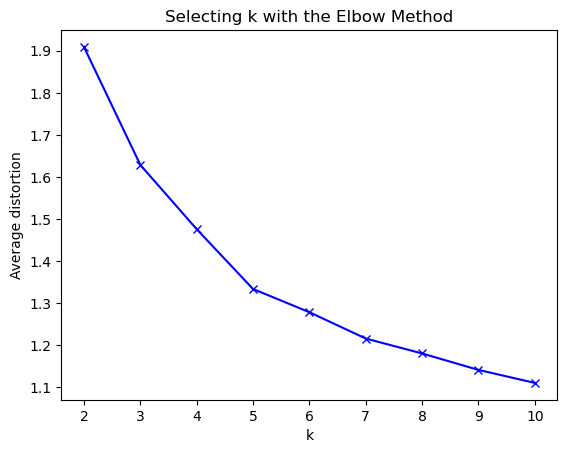

In [30]:
# Plotting a visual to find elbow point
plt.plot(clusters, meanDistortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Average distortion')
plt.title('Selecting k with the Elbow Method');

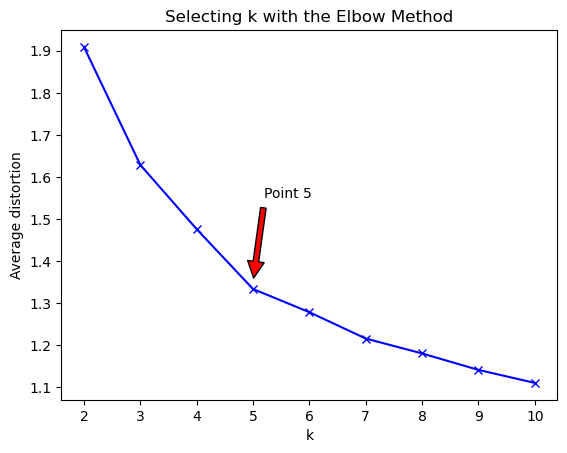

In [31]:
# Highlighting the elobow point on the above visual
plt.plot(clusters, meanDistortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Average distortion')
plt.title('Selecting k with the Elbow Method')
# Plotting the point
x, y = 5, 1.35
plt.plot(x, y, color="red")
# Annotating the point
plt.annotate("Point 5", xy = (x, y), xytext=(x + 0.2, y + 0.2), arrowprops = dict(facecolor = "red", shrink = 0.05))
plt.show()

The elbow point is 5.

In [32]:
# Training a K-means clustering model once again on the optimal number of clusters
final_model = KMeans(5)
final_model.fit(scaled_data)
prediction = final_model.predict(scaled_data)
print(prediction)

[2 2 2 2 2 2 2 2 2 2 2 2 2 2 4 0 0 0 4 4 4 4 4 4 0 2 2 2 2 4 4 4 0 0 0 0 0
 2 2 2 2 2 2 2 0 4 0 0 4 4 4 4 4 4 4 4 4 4 4 4 4 2 2 2 2 2 2 2 2 2 4 2 2 2
 2 4 4 4 4 4 4 4 4 4 2 2 2 2 2 2 2 2 2 2 2 2 0 0 0 0 0 4 2 2 2 2 0 4 4 4 4
 4 0 4 2 2 4 4 4 4 2 4 4 2 0 0 0 3 4 3 4 0 0 0 2 2 2 2 2 4 4 4 3 3 4 4 4 4
 4 4 0 0 0 0 2 2 2 2 0 0 0 0 0 0 2 4 1 0 1 4 4 4 0 4 0 4 4 4 4 3 4 4 1 1 4
 2 2 2 2 0 0 0 0 1 1 4 3 0 0 0 0 4 3 3 1 4 2 4 4 0 2 2 2 2 3 1 3 1 3 2 0 2
 2 0 0 0 0 2 2 2 2 4 1 3 1 1 1 3 4 4 4 4 3 1 3 3 3 0 2 2 0 0 0 1 0 0 0 0 0
 0 2 0 2 2 1 3 3 1 4 1 1 3 4 0 4 0 3 3 0 0 1 0 0 0 2 2 0 2 2 0 2 3 3 1 1 1
 0 1 0 1 1 3 3 1 1 1 1 3 3 1 3 1 1 1 0 3 3 3 3 3 3 1 3 3 3 3 1 3 3 3 3 3 3
 3 1 1 1 1 1 3 1 3 3 3 3 3 1 1 1 3 3 3 3 3 1 1 3 3 0 0 0 0 1 1 1 1 1 1 1 3
 3 3 1 1 3 3 3 3 3 3 1 1 1 0 3 1 1 1 3 1 1 1]


In [33]:
# Add a new feature in the DataFrame which will have labels based upon cluster value
data["Group"] = prediction
scaled_data["Group"] = prediction
print("Groups Assigned : \n")
data.head()

Groups Assigned : 



,car_name,mpg,cyl,disp,hp,wt,acc,yr,origin,Group
0,chevrolet chevelle malibu,18.0,8,307.0,130.0,3504,12.0,70,1,2
1,buick skylark 320,15.0,8,350.0,165.0,3693,11.5,70,1,2
2,plymouth satellite,18.0,8,318.0,150.0,3436,11.0,70,1,2
3,amc rebel sst,16.0,8,304.0,150.0,3433,12.0,70,1,2
4,ford torino,17.0,8,302.0,140.0,3449,10.5,70,1,2


In [34]:
clusters = scaled_data.groupby(['Group'])
clusters.mean()

,mpg,cyl,disp,hp,wt,acc,yr,origin
Group,,,,,,,,
0,-0.559929,0.442040,0.377479,-0.064562,0.384632,0.394206,-0.069201,-0.670028
1,0.707383,-0.746616,-0.595565,-0.570493,-0.502496,0.356308,0.992428,-0.621024
2,-1.156649,1.483947,1.489139,1.506794,1.391452,-1.075993,-0.682654,-0.716641
3,1.358529,-0.813700,-0.905971,-0.837200,-0.966061,0.435036,0.925820,1.503044
4,0.149908,-0.835725,-0.819852,-0.491417,-0.738321,0.192703,-0.718189,0.676144


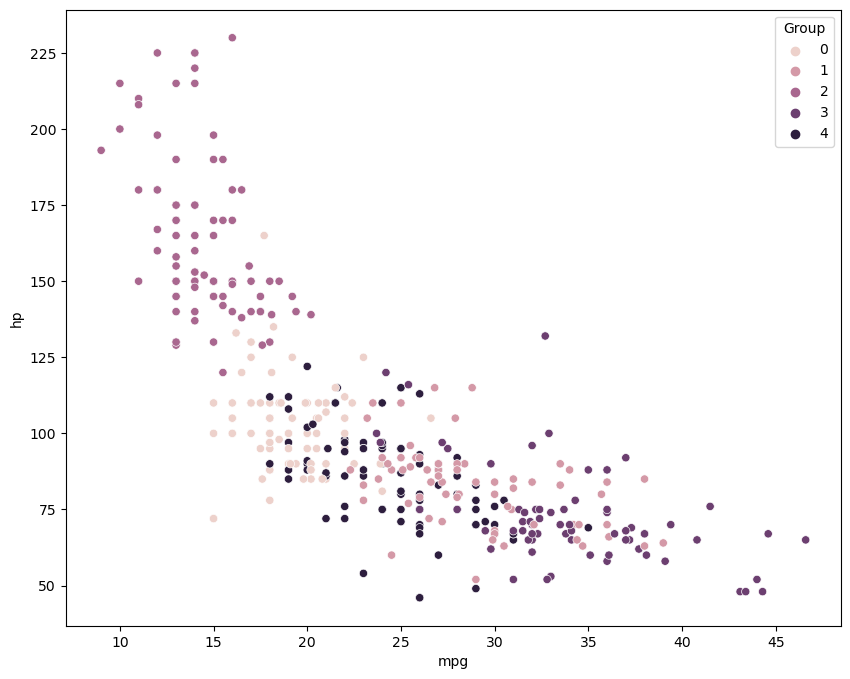

In [35]:
# Plotting a visual and colouring the datapoints based upon clusters
plt.figure(figsize=(10, 8))
sns.scatterplot(data = data, x = 'mpg', y = 'hp', hue = 'Group');

In [36]:
# Passing a new data point to predict which cluster it belongs to
new_data_point = {'mpg': 10.0, 'cyl': 3, 'disp': 400.0, 'hp': 150.0, 'wt': 3200, 'acc': 13.0, 'yr': 75, 'origin': 2}

# Appending the new data point to the DataFrame
data = data.append(new_data_point, ignore_index = True)

# Extracting the numerical variables
numerical_variables = data[['mpg', 'cyl', 'disp', 'hp', 'wt', 'acc', 'yr', 'origin']]

# Standardizing the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(numerical_variables)

# Fitting KMeans on the scaled data
km = KMeans(n_clusters = 5)
km.fit(scaled_data)

# Predicting the cluster for the new data point
new_data_point_scaled = scaler.transform([list(new_data_point.values())])
prediction = km.predict(new_data_point_scaled)

# Add the predicted cluster to the DataFrame
data['Group'] = km.labels_

print(data)

                      car_name   mpg  cyl   disp     hp      wt   acc    yr  \
0    chevrolet chevelle malibu  18.0  8.0  307.0  130.0  3504.0  12.0  70.0   
1            buick skylark 320  15.0  8.0  350.0  165.0  3693.0  11.5  70.0   
2           plymouth satellite  18.0  8.0  318.0  150.0  3436.0  11.0  70.0   
3                amc rebel sst  16.0  8.0  304.0  150.0  3433.0  12.0  70.0   
4                  ford torino  17.0  8.0  302.0  140.0  3449.0  10.5  70.0   
..                         ...   ...  ...    ...    ...     ...   ...   ...   
388                  vw pickup  44.0  4.0   97.0   52.0  2130.0  24.6  82.0   
389              dodge rampage  32.0  4.0  135.0   84.0  2295.0  11.6  82.0   
390                ford ranger  28.0  4.0  120.0   79.0  2625.0  18.6  82.0   
391                 chevy s-10  31.0  4.0  119.0   82.0  2720.0  19.4  82.0   
392                        NaN  10.0  3.0  400.0  150.0  3200.0  13.0  75.0   

     origin  Group  
0       1.0      2  
1       1

In [37]:
data.iloc[392]

car_name       NaN
mpg           10.0
cyl            3.0
disp         400.0
hp           150.0
wt          3200.0
acc           13.0
yr            75.0
origin         2.0
Group            1
Name: 392, dtype: object

The new data point belongs to Group 1 which is the 2nd cluster.

PART B

1. Data Understanding & Cleaning

In [38]:
# Reading ‘vehicle.csv’ and saving as a DataFrame
df = pd.read_csv("C:/Users/ruhee/OneDrive/Desktop/AIML/Unsupervised Learning/vehicle.csv")

In [39]:
df.shape

(846, 19)

In [40]:
df.head()

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio,class
0,95,48.0,83.0,178.0,72.0,10,162.0,42.0,20.0,159,176.0,379.0,184.0,70.0,6.0,16.0,187.0,197,van
1,91,41.0,84.0,141.0,57.0,9,149.0,45.0,19.0,143,170.0,330.0,158.0,72.0,9.0,14.0,189.0,199,van
2,104,50.0,106.0,209.0,66.0,10,207.0,32.0,23.0,158,223.0,635.0,220.0,73.0,14.0,9.0,188.0,196,car
3,93,41.0,82.0,159.0,63.0,9,144.0,46.0,19.0,143,160.0,309.0,127.0,63.0,6.0,10.0,199.0,207,van
4,85,44.0,70.0,205.0,103.0,52,149.0,45.0,19.0,144,241.0,325.0,188.0,127.0,9.0,11.0,180.0,183,bus


In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 846 entries, 0 to 845
Data columns (total 19 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   compactness                  846 non-null    int64  
 1   circularity                  841 non-null    float64
 2   distance_circularity         842 non-null    float64
 3   radius_ratio                 840 non-null    float64
 4   pr.axis_aspect_ratio         844 non-null    float64
 5   max.length_aspect_ratio      846 non-null    int64  
 6   scatter_ratio                845 non-null    float64
 7   elongatedness                845 non-null    float64
 8   pr.axis_rectangularity       843 non-null    float64
 9   max.length_rectangularity    846 non-null    int64  
 10  scaled_variance              843 non-null    float64
 11  scaled_variance.1            844 non-null    float64
 12  scaled_radius_of_gyration    844 non-null    float64
 13  scaled_radius_of_gyr

In [42]:
# Checking percentage of missing values
print(df.isnull().sum() * 100 / len(df))

compactness                    0.000000
circularity                    0.591017
distance_circularity           0.472813
radius_ratio                   0.709220
pr.axis_aspect_ratio           0.236407
max.length_aspect_ratio        0.000000
scatter_ratio                  0.118203
elongatedness                  0.118203
pr.axis_rectangularity         0.354610
max.length_rectangularity      0.000000
scaled_variance                0.354610
scaled_variance.1              0.236407
scaled_radius_of_gyration      0.236407
scaled_radius_of_gyration.1    0.472813
skewness_about                 0.709220
skewness_about.1               0.118203
skewness_about.2               0.118203
hollows_ratio                  0.000000
class                          0.000000
dtype: float64


Missing values are present in 'circularity', 'distance_circularity', 'radius_ratio', 'pr.axis_aspect_ratio', 'scatter_ratio', 'elongatedness', 'pr.axis_rectangularity', 'scaled_variance', 'scaled_variance.1', 'scaled_radius_of_gyration', 'scaled_radius_of_gyration.1', 'skewness_about', 'skewness_about.1' and 'skewness_about.2'

In [43]:
missing_values_cols = df.columns[df.isnull().any()]
df[missing_values_cols].isnull().sum()

circularity                    5
distance_circularity           4
radius_ratio                   6
pr.axis_aspect_ratio           2
scatter_ratio                  1
elongatedness                  1
pr.axis_rectangularity         3
scaled_variance                3
scaled_variance.1              2
scaled_radius_of_gyration      2
scaled_radius_of_gyration.1    4
skewness_about                 6
skewness_about.1               1
skewness_about.2               1
dtype: int64

In [44]:
df[df.isnull().any(axis = 1)][missing_values_cols].shape

(33, 14)

There are 33 rows with missing values.

In [45]:
# Replacing missing values with median values
for cols in df.columns:
    if cols != 'class': 
        df[cols] = df[cols].fillna(df[cols].median())

In [46]:
missing_values_cols = df.columns[df.isnull().any()]
df[missing_values_cols].isnull().sum()

Series([], dtype: float64)

All missing values have been replaced by their medians.

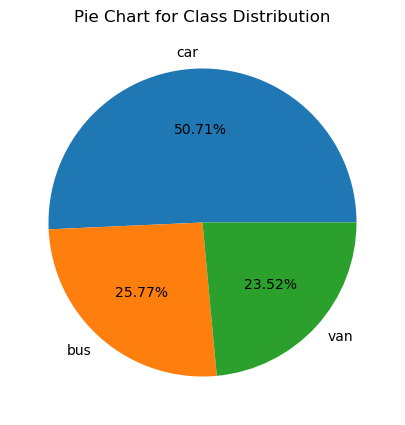

In [47]:
# Visualizing a Pie-chart and printing percentage of values for variable ‘class’
class_counts = df['class'].value_counts()
plt.figure(figsize=(6, 5))
plt.pie(class_counts, labels = class_counts.index, autopct = "%1.2f%%")
plt.title('Pie Chart for Class Distribution')
plt.show()

In [48]:
# Checking for duplicate rows in the data
print('Duplicated rows: ', df[df.duplicated()].shape[0])

Duplicated rows:  0


There are no duplicated rows in the dataframe.

2. Data Preparation

In [49]:
# Converting 'class' from 'object' to 'category'
df['class'] = df['class'].astype('category')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 846 entries, 0 to 845
Data columns (total 19 columns):
 #   Column                       Non-Null Count  Dtype   
---  ------                       --------------  -----   
 0   compactness                  846 non-null    int64   
 1   circularity                  846 non-null    float64 
 2   distance_circularity         846 non-null    float64 
 3   radius_ratio                 846 non-null    float64 
 4   pr.axis_aspect_ratio         846 non-null    float64 
 5   max.length_aspect_ratio      846 non-null    int64   
 6   scatter_ratio                846 non-null    float64 
 7   elongatedness                846 non-null    float64 
 8   pr.axis_rectangularity       846 non-null    float64 
 9   max.length_rectangularity    846 non-null    int64   
 10  scaled_variance              846 non-null    float64 
 11  scaled_variance.1            846 non-null    float64 
 12  scaled_radius_of_gyration    846 non-null    float64 
 13  scale

In [50]:
# Splitting data into X and Y
X = df.loc[:, df.columns != 'class']
y = df['class']

In [51]:
# Standardizing the data
XScaled = X.apply(zscore)
XScaled.head()

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio
0,0.160580,0.518073,0.057177,0.273363,1.310398,0.311542,-0.207598,0.136262,-0.224342,0.758332,-0.401920,-0.341934,0.285705,-0.327326,-0.073812,0.380870,-0.312012,0.183957
1,-0.325470,-0.623732,0.120741,-0.835032,-0.593753,0.094079,-0.599423,0.520519,-0.610886,-0.344578,-0.593357,-0.619724,-0.513630,-0.059384,0.538390,0.156798,0.013265,0.452977
2,1.254193,0.844303,1.519141,1.202018,0.548738,0.311542,1.148719,-1.144597,0.935290,0.689401,1.097671,1.109379,1.392477,0.074587,1.558727,-0.403383,-0.149374,0.049447
3,-0.082445,-0.623732,-0.006386,-0.295813,0.167907,0.094079,-0.750125,0.648605,-0.610886,-0.344578,-0.912419,-0.738777,-1.466683,-1.265121,-0.073812,-0.291347,1.639649,1.529056
4,-1.054545,-0.134387,-0.769150,1.082192,5.245643,9.444962,-0.599423,0.520519,-0.610886,-0.275646,1.671982,-0.648070,0.408680,7.309005,0.538390,-0.179311,-1.450481,-1.699181


3. Model Building

In [52]:
# Training a model using SVM
svc_model = SVC(C = 0.1, kernel = 'rbf')
svc_model.fit(XScaled, y)
# Predicting the response
prediction = svc_model.predict(XScaled)
# Accuracy
print(svc_model.score(XScaled, y))

0.9018912529550828


In [53]:
# Confusion Matrix
print("Confusion Matrix:\n",confusion_matrix(y, prediction))

Confusion Matrix:
 [[187  21  10]
 [  5 405  19]
 [  1  27 171]]


In [54]:
# Classification Report
print('Classification  Report:\n',classification_report(y, prediction))

Classification  Report:
               precision    recall  f1-score   support

         bus       0.97      0.86      0.91       218
         car       0.89      0.94      0.92       429
         van       0.85      0.86      0.86       199

    accuracy                           0.90       846
   macro avg       0.91      0.89      0.90       846
weighted avg       0.90      0.90      0.90       846



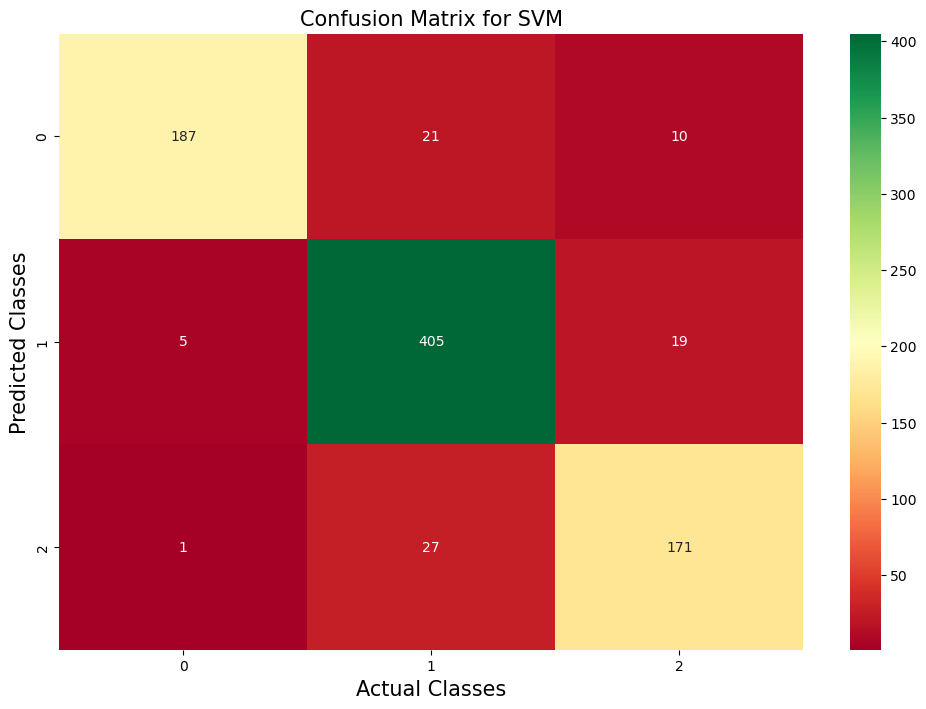

In [55]:
# Visualization of confusion matrix in the form of a heatmap
cm = confusion_matrix(y, prediction)
plt.figure(figsize = (12, 8))
sns.heatmap(cm, annot = True, cmap = 'RdYlGn', fmt = 'd')
plt.xlabel('Actual Classes', fontsize = 15)
plt.ylabel('Predicted Classes', fontsize = 15)
plt.title('Confusion Matrix for SVM', fontsize = 15);

In [56]:
covMatrix = np.cov(XScaled,rowvar = False)
print(covMatrix)

[[ 1.00118343  0.68569786  0.79086299  0.69055952  0.09164265  0.14842463
   0.81358214 -0.78968322  0.81465658  0.67694334  0.76297234  0.81497566
   0.58593517 -0.24988794  0.23635777  0.15720044  0.29889034  0.36598446]
 [ 0.68569786  1.00118343  0.79325751  0.6216467   0.15396023  0.25176438
   0.8489411  -0.82244387  0.84439802  0.96245572  0.79724837  0.83693508
   0.92691166  0.05200785  0.14436828 -0.01145212 -0.10455005  0.04640562]
 [ 0.79086299  0.79325751  1.00118343  0.76794246  0.15864319  0.26499957
   0.90614687 -0.9123854   0.89408198  0.77544391  0.86253904  0.88706577
   0.70660663 -0.22621115  0.1140589   0.26586088  0.14627113  0.33312625]
 [ 0.69055952  0.6216467   0.76794246  1.00118343  0.66423242  0.45058426
   0.73529816 -0.79041561  0.70922371  0.56962256  0.79435372  0.71928618
   0.53700678 -0.18061084  0.04877032  0.17394649  0.38266622  0.47186659]
 [ 0.09164265  0.15396023  0.15864319  0.66423242  1.00118343  0.64949139
   0.10385472 -0.18325156  0.07969

In [57]:
# Applying PCA on the data with 10 components
pca = PCA(n_components = 10)
pca.fit(XScaled)

PCA(n_components=10)

In [58]:
# Eigen Values
print(pca.explained_variance_)

[9.40460261 3.01492206 1.90352502 1.17993747 0.91726063 0.53999263
 0.35887012 0.22193246 0.1606086  0.09185722]


In [59]:
# Eigen Vectors
print(pca.components_)

[[ 2.75283688e-01  2.93258469e-01  3.04609128e-01  2.67606877e-01
   8.05039890e-02  9.72756855e-02  3.17092750e-01 -3.14133155e-01
   3.13959064e-01  2.82830900e-01  3.09280359e-01  3.13788457e-01
   2.72047492e-01 -2.08137692e-02  4.14555082e-02  5.82250207e-02
   3.02795063e-02  7.41453913e-02]
 [-1.26953763e-01  1.25576727e-01 -7.29516436e-02 -1.89634378e-01
  -1.22174860e-01  1.07482875e-02  4.81181371e-02  1.27498515e-02
   5.99352482e-02  1.16220532e-01  6.22806229e-02  5.37843596e-02
   2.09233172e-01  4.88525148e-01 -5.50899716e-02 -1.24085090e-01
  -5.40914775e-01 -5.40354258e-01]
 [-1.19922479e-01 -2.48205467e-02 -5.60143254e-02  2.75074211e-01
   6.42012966e-01  5.91801304e-01 -9.76283108e-02  5.76484384e-02
  -1.09512416e-01 -1.70641987e-02  5.63239801e-02 -1.08840729e-01
  -3.14636493e-02  2.86277015e-01 -1.15679354e-01 -7.52828901e-02
   8.73592034e-03  3.95242743e-02]
 [ 7.83843562e-02  1.87337408e-01 -7.12008427e-02 -4.26053415e-02
   3.27257119e-02  3.14147277e-02 -9.

In [60]:
# Explained Variance Ratio
print(pca.explained_variance_ratio_)

[0.52186034 0.16729768 0.10562639 0.0654746  0.05089869 0.02996413
 0.01991366 0.01231501 0.00891215 0.00509715]


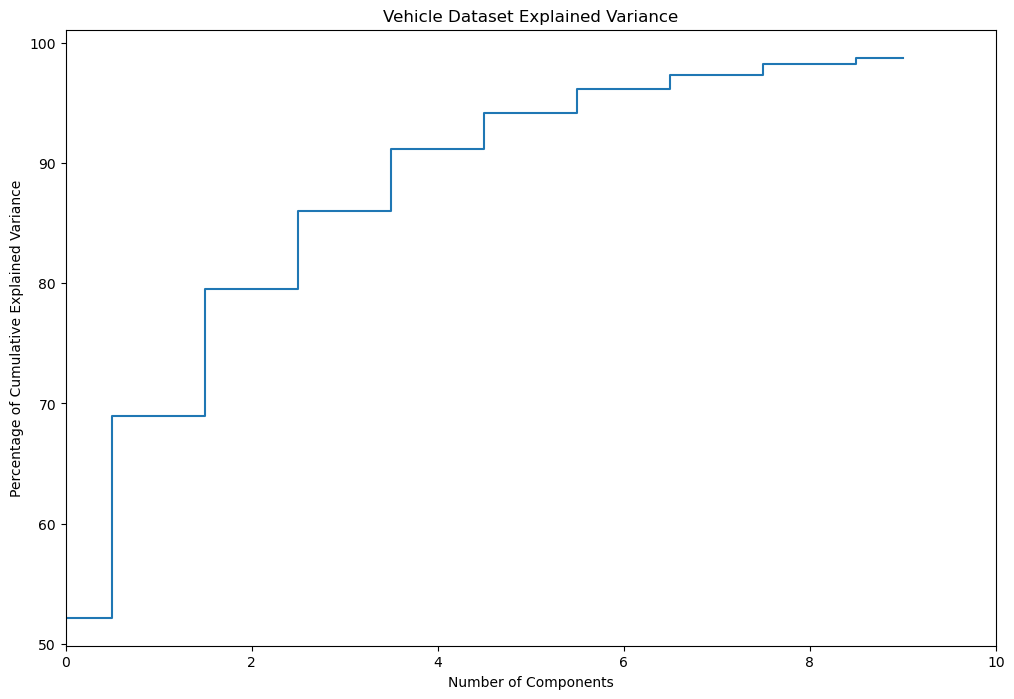

In [61]:
# Visualizing Cumulative Variance Explained with Number of Components
plt.figure(figsize = (12, 8))
plt.step(list(range(len(pca.explained_variance_ratio_))),
         (np.cumsum(pca.explained_variance_ratio_) * 100), where = 'mid')
plt.xlim(0, len(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Percentage of Cumulative Explained Variance')
plt.title('Vehicle Dataset Explained Variance');

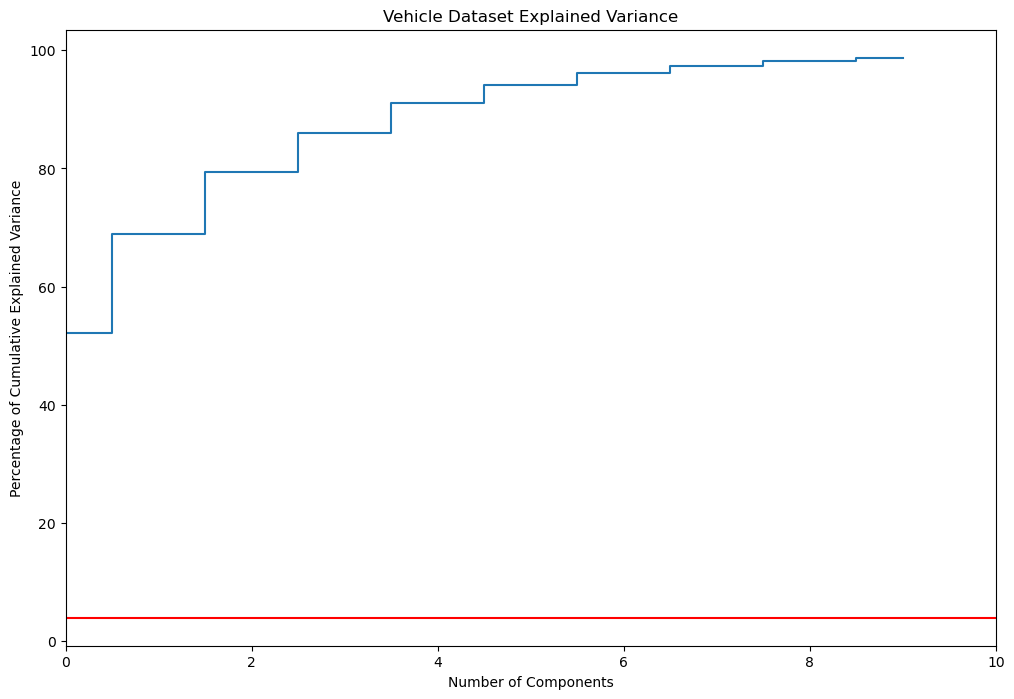

In [62]:
# Drawing a horizontal line on the above plot to highlight the threshold of 90%
plt.figure(figsize = (12, 8))
plt.step(list(range(len(pca.explained_variance_ratio_))),
         (np.cumsum(pca.explained_variance_ratio_) * 100), where = 'mid')

# Calculating the number of components required to explain 90% of the variance
n_components = np.argmax(np.cumsum(pca.explained_variance_ratio_) >= 0.9)

# Drawing a horizontal line at the number of components calculated
plt.axhline(n_components, color="red")
plt.xlim(0, len(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Percentage of Cumulative Explained Variance')
plt.title('Vehicle Dataset Explained Variance');

In [63]:
# Number of Components required to explain 90% variance
print("The number of components required to explain 90% of the variance is:", n_components)

The number of components required to explain 90% of the variance is: 4


In [64]:
# Applying PCA on the data by selecting minimum components with 90% or above variance explained
pca4 = PCA(n_components = 4)
pca4.fit(XScaled)

PCA(n_components=4)

In [65]:
print(pca4.components_)

[[ 0.27528369  0.29325847  0.30460913  0.26760688  0.08050399  0.09727569
   0.31709275 -0.31413315  0.31395906  0.2828309   0.30928036  0.31378846
   0.27204749 -0.02081377  0.04145551  0.05822502  0.03027951  0.07414539]
 [-0.12695376  0.12557673 -0.07295164 -0.18963438 -0.12217486  0.01074829
   0.04811814  0.01274985  0.05993525  0.11622053  0.06228062  0.05378436
   0.20923317  0.48852515 -0.05508997 -0.12408509 -0.54091477 -0.54035426]
 [-0.11992248 -0.02482055 -0.05601433  0.27507421  0.64201297  0.5918013
  -0.09762831  0.05764844 -0.10951242 -0.0170642   0.05632398 -0.10884073
  -0.03146365  0.28627701 -0.11567935 -0.07528289  0.00873592  0.03952427]
 [ 0.07838436  0.18733741 -0.07120084 -0.04260534  0.03272571  0.03141473
  -0.09574857  0.0822902  -0.0924583   0.18800561 -0.11984401 -0.09174493
   0.20009523 -0.06550514  0.60479425 -0.66611412  0.10552625  0.04748903]]


In [66]:
print(pca4.explained_variance_ratio_)

[0.52186034 0.16729768 0.10562639 0.0654746 ]


In [67]:
Xpca4 = pca4.transform(XScaled)
Xpca4

array([[ 3.34162030e-01, -2.19026358e-01,  1.00158417e+00,
         1.76612370e-01],
       [-1.59171085e+00, -4.20602982e-01, -3.69033854e-01,
         2.33234117e-01],
       [ 3.76932418e+00,  1.95282752e-01,  8.78587404e-02,
         1.20221219e+00],
       ...,
       [ 4.80917387e+00, -1.24931049e-03,  5.32333105e-01,
         2.95652324e-01],
       [-3.29409242e+00, -1.00827615e+00, -3.57003198e-01,
        -1.93367514e+00],
       [-4.76505347e+00,  3.34899728e-01, -5.68136078e-01,
        -1.22480708e+00]])

In [68]:
# Training SVM model on the PCA data
svm_pca = SVC(C = 0.1, kernel = 'rbf')
svm_pca.fit(Xpca4, y)
# Predicting the response
prediction = svm_pca.predict(Xpca4)
# Accuracy
print(svm_pca.score(Xpca4, y))

0.6962174940898345


In [69]:
# Confusion Matrix
print("Confusion Matrix:\n",confusion_matrix(y, prediction))

Confusion Matrix:
 [[114  71  33]
 [  8 363  58]
 [ 45  42 112]]


In [70]:
# Classification Report
print('Classification  Report:\n',classification_report(y, prediction))

Classification  Report:
               precision    recall  f1-score   support

         bus       0.68      0.52      0.59       218
         car       0.76      0.85      0.80       429
         van       0.55      0.56      0.56       199

    accuracy                           0.70       846
   macro avg       0.67      0.64      0.65       846
weighted avg       0.69      0.70      0.69       846



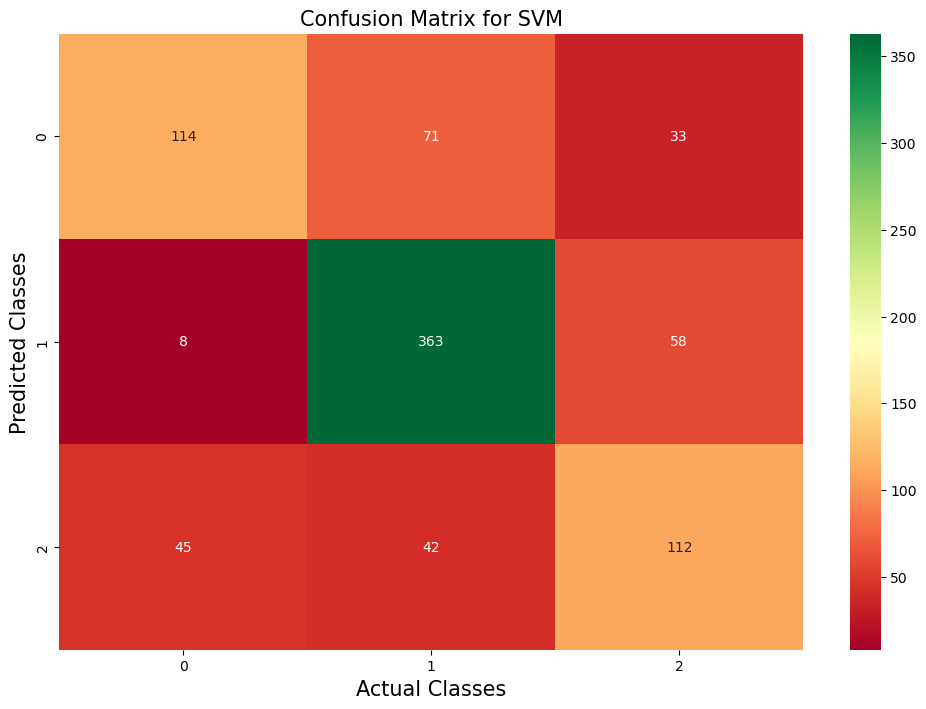

In [71]:
# Visualization of confusion matrix in the form of a heatmap
cm = confusion_matrix(y, prediction)
plt.figure(figsize = (12, 8))
sns.heatmap(cm, annot = True, cmap = 'RdYlGn', fmt = 'd')
plt.xlabel('Actual Classes', fontsize = 15)
plt.ylabel('Predicted Classes', fontsize = 15)
plt.title('Confusion Matrix for SVM', fontsize = 15);

Accuracy was 90.2% for the previous model and it has now dropped to 69.6%.

4. Performance Improvement

In [72]:
#Grid search to tune model parameters for SVM
from sklearn.model_selection import GridSearchCV
model = SVC()
params = {'C': [0.05, 0.1, 0.5, 1, 1.5, 2], 'kernel': ['linear', 'rbf']}
model1 = GridSearchCV(model, param_grid = params, verbose = 5)
model1.fit(Xpca4, y)
print("Best Hyper Parameters:\n", model1.best_params_)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV 1/5] END .............C=0.05, kernel=linear;, score=0.618 total time=   0.0s
[CV 2/5] END .............C=0.05, kernel=linear;, score=0.657 total time=   0.0s
[CV 3/5] END .............C=0.05, kernel=linear;, score=0.657 total time=   0.0s
[CV 4/5] END .............C=0.05, kernel=linear;, score=0.716 total time=   0.0s
[CV 5/5] END .............C=0.05, kernel=linear;, score=0.680 total time=   0.0s
[CV 1/5] END ................C=0.05, kernel=rbf;, score=0.600 total time=   0.0s
[CV 2/5] END ................C=0.05, kernel=rbf;, score=0.633 total time=   0.0s
[CV 3/5] END ................C=0.05, kernel=rbf;, score=0.609 total time=   0.0s
[CV 4/5] END ................C=0.05, kernel=rbf;, score=0.627 total time=   0.0s
[CV 5/5] END ................C=0.05, kernel=rbf;, score=0.621 total time=   0.0s
[CV 1/5] END ..............C=0.1, kernel=linear;, score=0.624 total time=   0.0s
[CV 2/5] END ..............C=0.1, kernel=linear;

The best parameters are C = 2 and kernel = 'rbf'.

In [73]:
# Building the tuned SVM model
svm_tuned = SVC(C = 2, kernel = 'rbf')
svm_tuned.fit(Xpca4, y)
# Predicting the response
prediction = svm_tuned.predict(Xpca4)
# Accuracy
print(svm_tuned.score(Xpca4, y))

0.8132387706855791


In [74]:
# Confusion Matrix
print("Confusion Matrix:\n",confusion_matrix(y, prediction))

Confusion Matrix:
 [[156  31  31]
 [ 11 380  38]
 [ 16  31 152]]


In [75]:
# Classification Report
print('Classification  Report:\n',classification_report(y, prediction))

Classification  Report:
               precision    recall  f1-score   support

         bus       0.85      0.72      0.78       218
         car       0.86      0.89      0.87       429
         van       0.69      0.76      0.72       199

    accuracy                           0.81       846
   macro avg       0.80      0.79      0.79       846
weighted avg       0.82      0.81      0.81       846



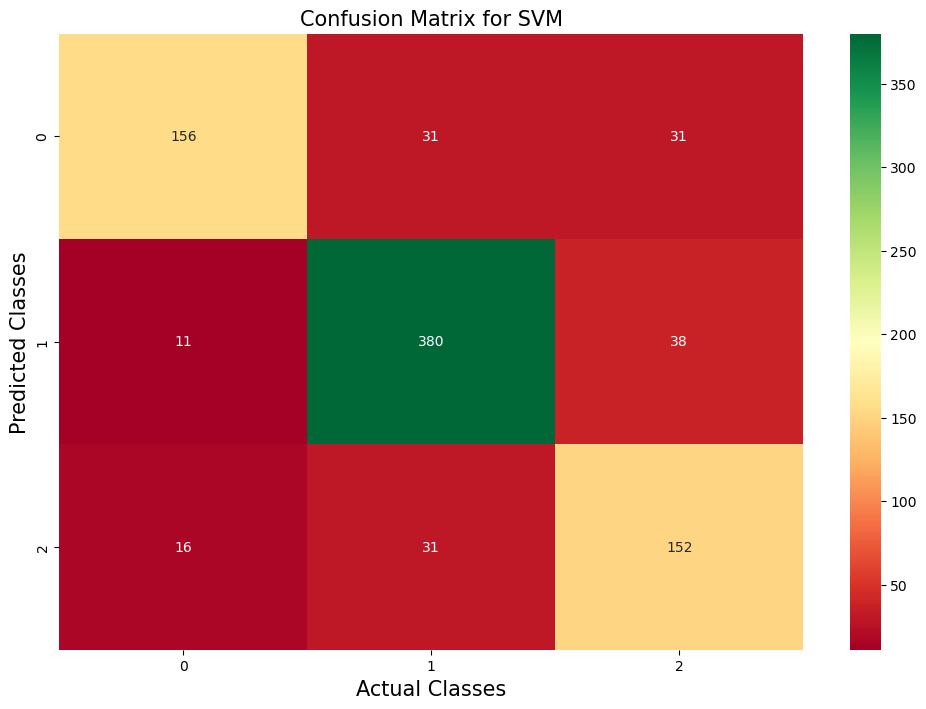

In [76]:
# Visualization of confusion matrix in the form of a heatmap
cm = confusion_matrix(y, prediction)
plt.figure(figsize = (12, 8))
sns.heatmap(cm, annot = True, cmap = 'RdYlGn', fmt = 'd')
plt.xlabel('Actual Classes', fontsize = 15)
plt.ylabel('Predicted Classes', fontsize = 15)
plt.title('Confusion Matrix for SVM', fontsize = 15);

The model improved after tuning it.

The 1st SVM model has an accuracy of 90.2%.

The 2nd SVM model has an accuracy of 69.6%.

The 3rd SVM model has an accuracy of 81.3%.

5. Data Understanding & Cleaning

Pre-requisite/assumptions of PCA

1. PCA assumes linear relationship between attributes.

2. PCA assumes a high correlation between features.

Advantages of PCA

1. PCA lowers the dimensions which prevents overfitting.

2. Principal components are independent of each other, so removes correlated features.

Limitations of PCA

1. PCA is sensitive to the scale of the features.

2. PCA is not robust against outliers.

3. PCA is ineffective when relationships are non-linear.